In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
data=pd.read_csv('/content/Copper_Set.xlsx - Result 1.csv')

In [ ]:
data

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176446,E842CC08-C367-484C-9BFC-81BB4C110BAE,20200708.0,48.57964266,30205078.0,26.0,To be approved,S,10.0,2.90,1780.0,0000000000000000000000000000000701000100,1.641416e+08,20200801.0,623.00
176447,DDBF6A5B-DB8E-4162-BF88-1EE491E3F920,20200708.0,3022.304001,30336279.0,78.0,Won,W,59.0,2.00,1035.0,NaN,6.406650e+05,20200701.0,535.00
176448,79810B6C-D5F6-4FC1-A92B-F813231829E2,20200708.0,4.568723085,30231432.0,78.0,Won,W,41.0,0.50,1250.0,QBR03,6.119930e+05,20200701.0,974.00
176449,B9254C79-D0CC-494B-8EEA-1F129885817F,20200708.0,3.00494926,30213686.0,78.0,Won,W,10.0,10.00,1000.0,S355J2+N-CL1,6.406650e+05,20200801.0,490.00


In [ ]:
data_1=data.copy()
data_1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,20210301.0,577.00


In [ ]:
data_1.shape

(176451, 14)

In [ ]:
data_1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [ ]:
data_1.drop(columns = ['id'],inplace=True)

In [ ]:
data_1.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.0


In [ ]:
data_1.isnull().sum()

item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     75781
product_ref          1
delivery date        2
selling_price        2
dtype: int64

In [ ]:
# looking for the percentage of null data in the dataframe
pd.DataFrame(data_1.isna().mean()*100).T

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,0.000567,0.0,0.000567,0.015868,0.001133,0.0,0.013602,0.000567,0.0,42.947334,0.000567,0.001133,0.001133


In [ ]:
#data_2=data_1.drop(columns=['material_ref'],inplace=True)
# material_ref has large set of null values, so replacing them with unknown
data_1['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
#data_1 = data_1.dropna()

In [ ]:
data_1.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1.670799e+09,20210701.0,854.0


In [ ]:
data_1.isnull().sum()

item_date         1
quantity tons     0
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       1
delivery date     2
selling_price     2
dtype: int64

In [ ]:
# filling the missing values using statistical techniques
data_1 = data_1.fillna({'item_date': st.mode(data_1['item_date']),
                'delivery date': st.mode(data_1['delivery date']),
                'customer': data_1['customer'].mean(),
                'country': data_1['country'].mean(),
                'application': data_1['application'].mean(),
                'selling_price': data_1['selling_price'].mean(),
                'thickness': data_1['thickness'].median()})

In [ ]:
data_1['status'].fillna(data_1['status'].mode()[0], inplace = True)

In [ ]:
data_1.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      1
delivery date    0
selling_price    0
dtype: int64

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176451 entries, 0 to 176450
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      176451 non-null  float64
 1   quantity tons  176451 non-null  object 
 2   customer       176451 non-null  float64
 3   country        176451 non-null  float64
 4   status         176451 non-null  object 
 5   item type      176451 non-null  object 
 6   application    176451 non-null  float64
 7   thickness      176451 non-null  float64
 8   width          176451 non-null  float64
 9   material_ref   176451 non-null  object 
 10  product_ref    176450 non-null  float64
 11  delivery date  176451 non-null  float64
 12  selling_price  176451 non-null  float64
dtypes: float64(9), object(4)
memory usage: 17.5+ MB


In [ ]:
#converting quantity value to numeric float type
#data_1['item_date'] = pd.to_datetime(data_1['item_date'])
#data_1['delivery date'] = pd.to_datetime(data_1['delivery date'])
#data_1['quantity tons'] = pd.to_numeric(data_1['quantity tons'], errors='coerce')

In [ ]:
# dealing with data in wrong format
# for categorical variables, this step is ignored
# df = df[df['status'].isin(['Won', 'Lost'])]
data_1['item_date'] = pd.to_datetime(data_1['item_date'], format='%Y%m%d', errors='coerce').dt.date
data_1['quantity tons'] = pd.to_numeric(data_1['quantity tons'], errors='coerce')
data_1['customer'] = pd.to_numeric(data_1['customer'], errors='coerce')
data_1['country'] = pd.to_numeric(data_1['country'], errors='coerce')
data_1['application'] = pd.to_numeric(data_1['application'], errors='coerce')
data_1['thickness'] = pd.to_numeric(data_1['thickness'], errors='coerce')
data_1['width'] = pd.to_numeric(data_1['width'], errors='coerce')
data_1['product_ref'] = pd.to_numeric(data_1['product_ref'], errors='coerce')
data_1['delivery date'] = pd.to_datetime(data_1['delivery date'], format='%Y%m%d', errors='coerce').dt.date
data_1['selling_price'] = pd.to_numeric(data_1['selling_price'], errors='coerce')

In [ ]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176451 entries, 0 to 176450
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      176449 non-null  object 
 1   quantity tons  176450 non-null  float64
 2   customer       176451 non-null  float64
 3   country        176451 non-null  float64
 4   status         176451 non-null  object 
 5   item type      176451 non-null  object 
 6   application    176451 non-null  float64
 7   thickness      176451 non-null  float64
 8   width          176451 non-null  float64
 9   material_ref   176451 non-null  object 
 10  product_ref    176450 non-null  float64
 11  delivery date  176449 non-null  object 
 12  selling_price  176451 non-null  float64
dtypes: float64(8), object(5)
memory usage: 17.5+ MB


In [ ]:
data_1['quantity tons'].value_counts()

54.151139    1
12.202590    1
12.769324    1
26.798462    1
33.830052    1
            ..
16.151161    1
13.413305    1
10.011271    1
14.526247    1
48.336010    1
Name: quantity tons, Length: 176450, dtype: int64

In [ ]:
data_1['customer'].value_counts()

30157111.0    4876
30161088.0    3474
30201846.0    3133
30165529.0    2728
30202938.0    2548
              ... 
30147616.0       1
30357481.0       1
30340816.0       1
30271291.0       1
30406633.0       1
Name: customer, Length: 1159, dtype: int64

In [ ]:
data_1['country'].value_counts()

78.000000     30880
26.000000     26918
25.000000     22332
27.000000     21149
32.000000     18012
28.000000     15603
84.000000     12491
77.000000      9622
30.000000      8088
39.000000      3690
79.000000      2702
38.000000      1687
40.000000      1636
80.000000       804
113.000000      714
89.000000        90
44.916695        28
107.000000        5
Name: country, dtype: int64

In [ ]:
data_1['status'].value_counts()

Won                112011
Lost                33660
Not lost for AM     19234
Revised              4195
To be approved       4160
Draft                3127
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [ ]:
data_1['item type'].value_counts()

W         101966
S          67749
PL          5586
Others       610
WI           512
IPL           27
SLAWR          1
Name: item type, dtype: int64

In [ ]:
data_1['application'].value_counts()

10.00000    75319
41.00000    44448
15.00000    20344
59.00000     8729
42.00000     5745
56.00000     4690
29.00000     1886
27.00000     1748
26.00000     1609
28.00000     1590
40.00000     1559
25.00000     1467
79.00000     1420
22.00000     1017
20.00000      759
66.00000      661
3.00000       635
38.00000      505
58.00000      444
4.00000       286
39.00000      267
65.00000      246
67.00000      219
68.00000      181
19.00000      143
99.00000      142
69.00000      122
5.00000       110
70.00000      102
2.00000        34
25.58919       24
Name: application, dtype: int64

In [ ]:
data_1['thickness'].value_counts()

2.00      13074
3.00      12872
0.50      12024
1.50      11457
1.00       9261
          ...  
400.00        1
7.55          1
7.06          1
9.39          1
2.29          1
Name: thickness, Length: 590, dtype: int64

In [ ]:
data_1['width'].value_counts()

1250.0    38248
1500.0    31846
1000.0    11948
2000.0     7452
1220.0     4299
          ...  
778.0         1
1.0           1
687.0         1
1921.0        1
1633.0        1
Name: width, Length: 1383, dtype: int64

In [ ]:
data_1['product_ref'].value_counts()

6.119930e+05    44214
1.641416e+08    27627
6.406650e+05    26708
1.670799e+09    18422
6.283770e+05    18185
1.668702e+09    14949
6.404050e+05     9383
1.671864e+09     5086
1.332077e+09     4399
1.693868e+09     1796
1.668701e+09     1195
1.671876e+09      822
6.281170e+05      765
1.643372e+08      649
1.668702e+09      359
1.693868e+09      290
1.282008e+09      281
1.721130e+09      251
1.665572e+09      198
6.281120e+05      176
6.117280e+05      148
1.690738e+09      146
1.722208e+09      125
6.404000e+05       83
1.668702e+09       54
1.643364e+08       49
6.117330e+05       45
1.690738e+09       19
1.665584e+09       12
1.665572e+09       10
1.665585e+09        2
9.294238e+08        1
1.665585e+09        1
Name: product_ref, dtype: int64

In [ ]:
data_1.drop_duplicates()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.000000
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,2021-04-01,1047.000000
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.330000
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,2021-01-01,768.000000
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,2021-03-01,577.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176446,2020-07-08,48.579643,30205078.0,26.0,To be approved,S,10.0,2.90,1780.0,0000000000000000000000000000000701000100,1.641416e+08,2020-08-01,623.000000
176447,2020-07-08,3022.304001,30336279.0,78.0,Won,W,59.0,2.00,1035.0,unknown,6.406650e+05,2020-07-01,535.000000
176448,2020-07-08,4.568723,30231432.0,78.0,Won,W,41.0,0.50,1250.0,QBR03,6.119930e+05,2020-07-01,974.000000
176449,2020-07-08,3.004949,30213686.0,78.0,Won,W,10.0,10.00,1000.0,S355J2+N-CL1,6.406650e+05,2020-08-01,490.000000


In [ ]:
data_1.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.764500e+05,1.764510e+05,176451.000000,176451.000000,176451.000000,176451.000000,1.764500e+05,1.764510e+05
mean,6.045826e+03,3.052049e+07,44.916695,25.589190,2.570234,1295.473026,4.763355e+08,1.955155e+03
std,2.383588e+06,2.469115e+07,24.418916,17.766678,6.652452,262.173577,7.190487e+08,3.366686e+05
min,-4.000000e+00,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.120539e+01,3.019688e+07,26.000000,10.000000,0.700000,1179.000000,6.119930e+05,6.750000e+02
50%,3.040785e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.160000e+02
75%,6.732497e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.570000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [ ]:
q3 = data_1.application.quantile(0.75)
q1 = data_1.application.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres

(87.5, -36.5)

In [ ]:
q3 = data_1.customer.quantile(0.75)
q1 = data_1.customer.quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres

(30405714.0, 30071586.0)

In [ ]:
q3 = data_1['quantity tons'].quantile(0.75)
q1 = data_1['quantity tons'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres

(151.5043400925, -72.9739823275)

In [ ]:

q3 = data_1['thickness'].quantile(0.75)
q1 = data_1['thickness'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres


(6.449999999999999, -2.75)

In [ ]:

q3 = data_1['width'].quantile(0.75)
q1 = data_1['width'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres


(1981.5, 697.5)

In [ ]:

q3 = data_1['product_ref'].quantile(0.75)
q1 = data_1['product_ref'].quantile(0.25)
iqr = (q3 - q1)
upper_tres = q3 + (1.5*iqr)
lower_tres = q1 - (1.5*iqr)
upper_tres ,lower_tres


(3329274853.0, -1996585723.0)

In [ ]:
data_1.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.0


In [ ]:
df=data_1.copy()
df.head(1)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.0


In [ ]:
df_1=df.select_dtypes(["int64","float64"])

quantity tons
nan


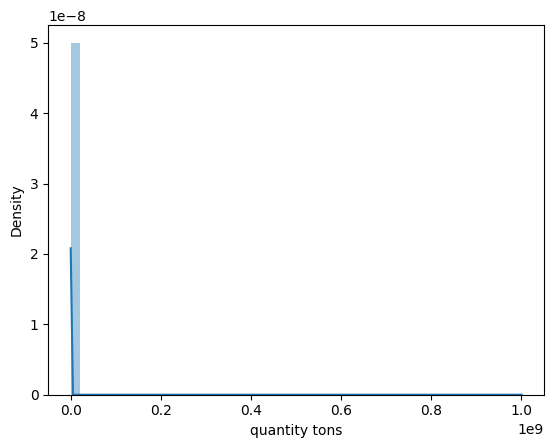

customer
85.72486835934254


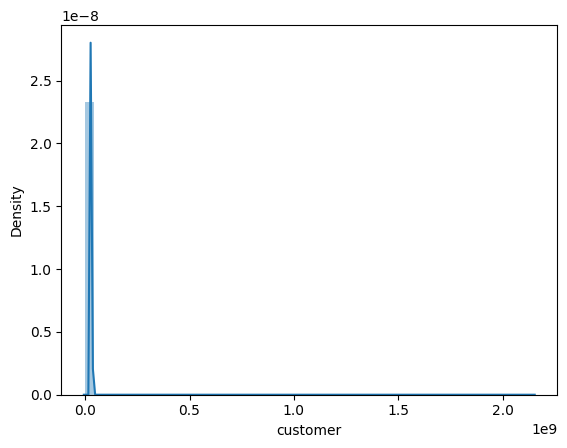

country
0.7529847149342801


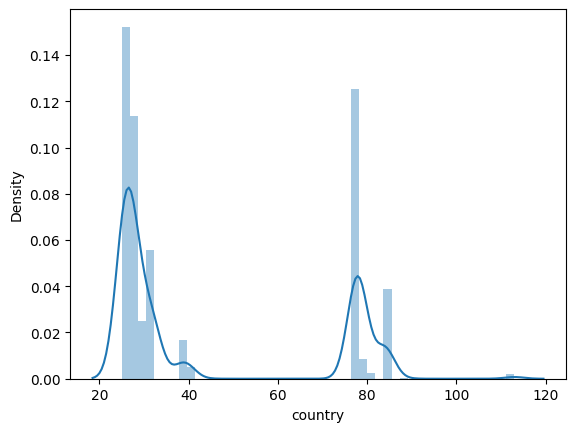

application
0.7328405742102669


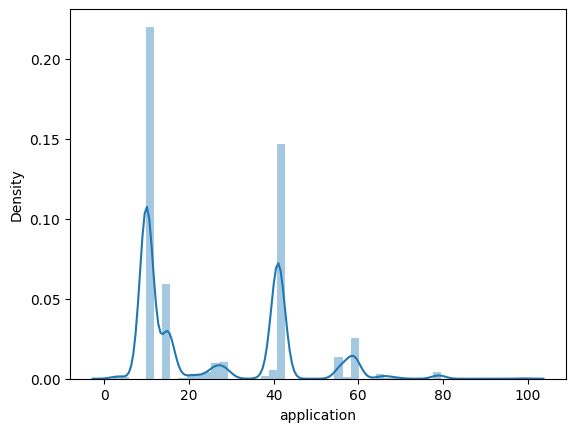

thickness
301.2612455957011


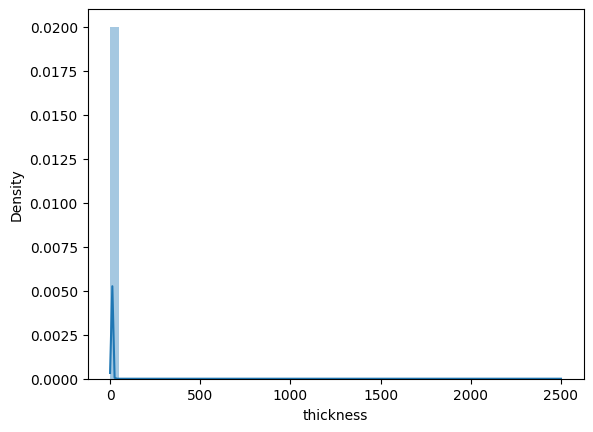

width
0.36553903191152065


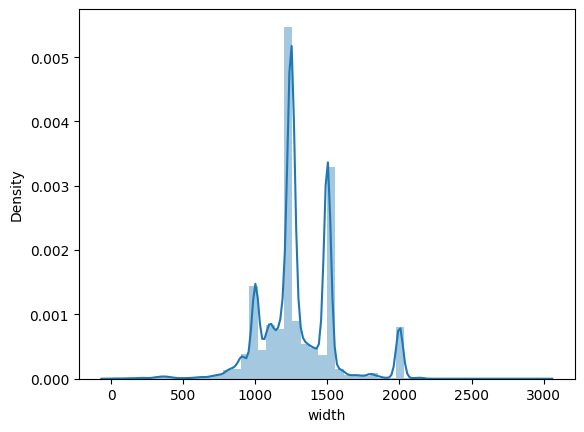

product_ref
nan


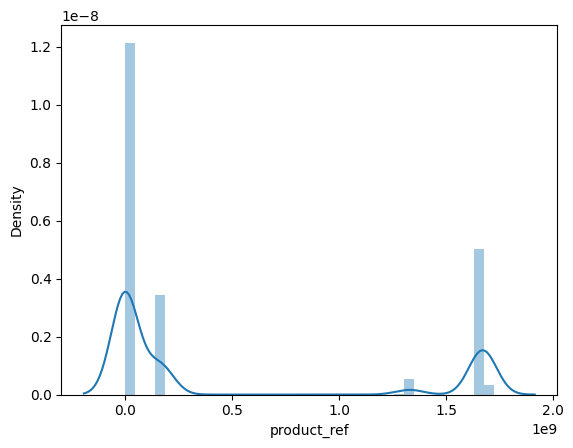

selling_price
297.02237204844124


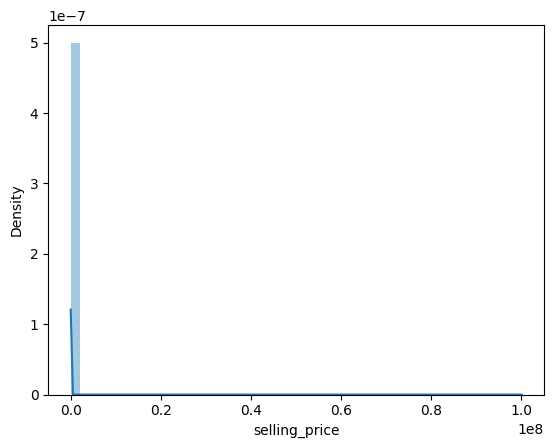

In [ ]:
from scipy.stats import skew
for col in df_1:
  print(col)
  print(skew(df_1[col]))
  plt.figure()
  sns.distplot(df_1[col])
  plt.show()

In [ ]:
import numpy as np
mask1 = df['selling_price'] <= 0
print(mask1.sum())
df.loc[mask1, 'selling_price'] = np.nan

mask1 = df['quantity tons'] <= 0
print(mask1.sum())
df.loc[mask1, 'quantity tons'] = np.nan

mask1 = df['thickness'] <= 0
print(mask1.sum())

7
2
0


In [ ]:
df.isnull().sum()

item_date        2
quantity tons    3
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      1
delivery date    2
selling_price    7
dtype: int64

In [ ]:
df.dropna(inplace=True)

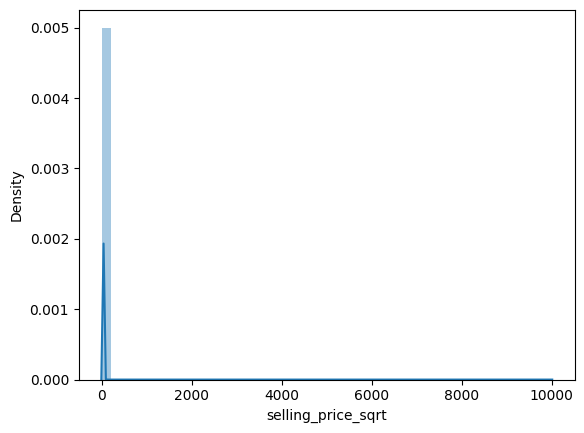

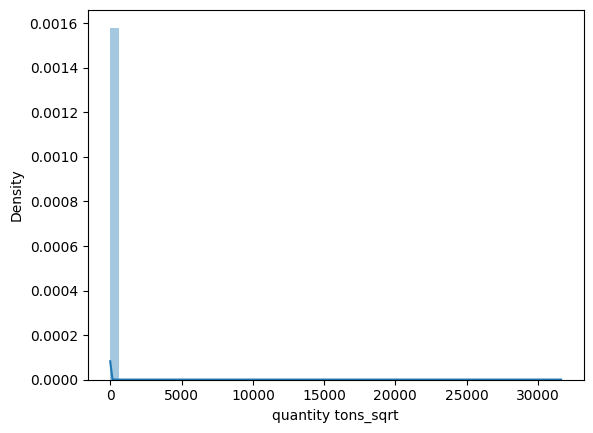

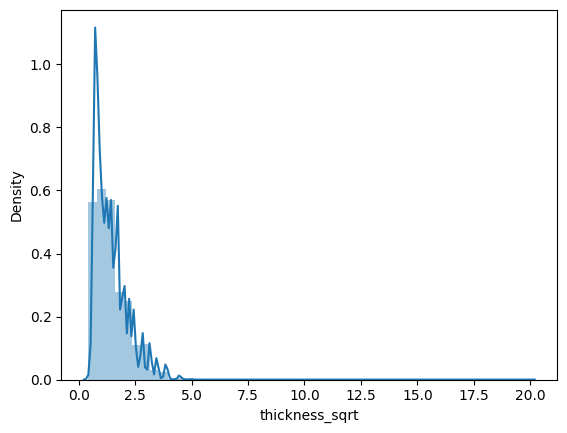

In [ ]:
import numpy as np
df['selling_price_sqrt'] = np.sqrt(df['selling_price'])
sns.distplot(df['selling_price_sqrt'])
plt.show()

df['quantity tons_sqrt'] = np.sqrt(df['quantity tons'])
sns.distplot(df['quantity tons_sqrt'])
plt.show()

df['thickness_sqrt'] = np.sqrt(df['thickness'])
sns.distplot(df['thickness_sqrt'])
plt.show()

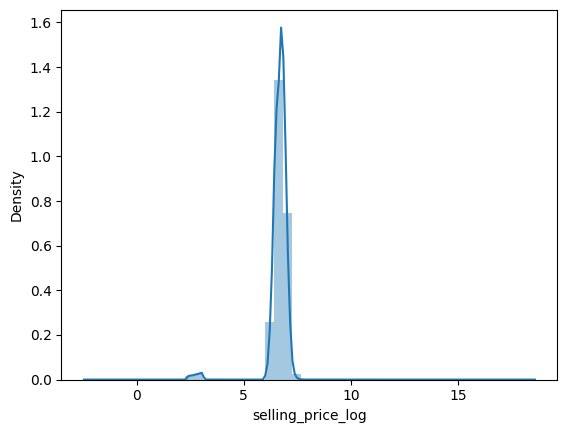

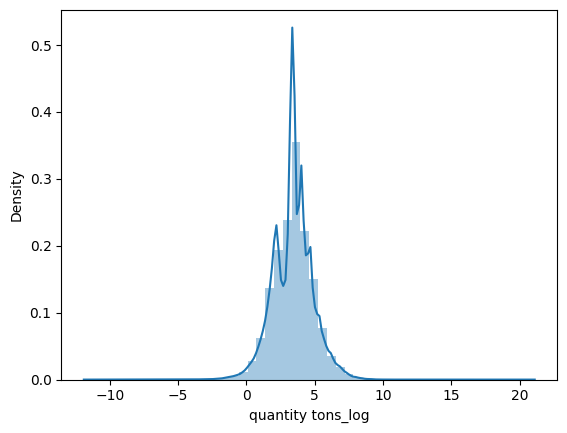

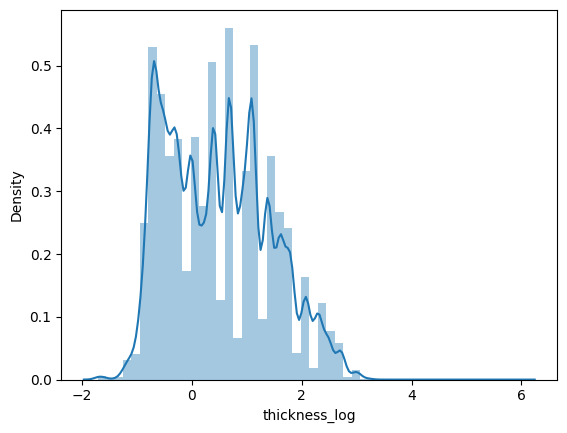

In [ ]:
import numpy as np
df['selling_price_log'] = np.log(df['selling_price'])
sns.distplot(df['selling_price_log'])
plt.show()

df['quantity tons_log'] = np.log(df['quantity tons'])
sns.distplot(df['quantity tons_log'])
plt.show()

df['thickness_log'] = np.log(df['thickness'])
sns.distplot(df['thickness_log'])
plt.show()


In [ ]:
Continues=['quantity tons_log','customer','country','application','thickness_log','width','selling_price_log','thickness_sqrt','quantity tons_sqrt','selling_price_sqrt']
for i in Continues:
    print(i,"--",df[i].skew())

quantity tons_log -- -0.07119157458853329
customer -- 85.72195191808976
country -- 0.7529407868597099
application -- 0.7328802093626084
thickness_log -- 0.34646959653020104
width -- 0.3655237937017718
selling_price_log -- -5.3404271986672915
thickness_sqrt -- 1.3802161617914874
quantity tons_sqrt -- 390.42827137698924
selling_price_sqrt -- 288.3125123539253


In [ ]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_sqrt,quantity tons_sqrt,thickness_sqrt,selling_price_log,quantity tons_log,thickness_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.00,29.223278,7.358746,1.414214,6.749931,3.991779,0.693147
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1.668702e+09,2021-04-01,1047.00,32.357379,27.713261,0.894427,6.953684,6.643822,-0.223144
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.33,25.383656,19.650139,0.616441,6.468211,5.956169,-0.967584
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,2021-01-01,768.00,27.712813,14.227124,1.516575,6.643790,5.310301,0.832909
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,2021-03-01,577.00,24.020824,28.027241,2.000000,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176445,2020-07-08,36.717238,30213686.0,78.0,Won,W,10.0,8.00,2000.0,S355J2+N-CL1,6.406650e+05,2020-08-01,498.00,22.315914,6.059475,2.828427,6.210600,3.603246,2.079442
176446,2020-07-08,48.579643,30205078.0,26.0,To be approved,S,10.0,2.90,1780.0,0000000000000000000000000000000701000100,1.641416e+08,2020-08-01,623.00,24.959968,6.969910,1.702939,6.434547,3.883205,1.064711
176447,2020-07-08,3022.304001,30336279.0,78.0,Won,W,59.0,2.00,1035.0,unknown,6.406650e+05,2020-07-01,535.00,23.130067,54.975485,1.414214,6.282267,8.013775,0.693147
176448,2020-07-08,4.568723,30231432.0,78.0,Won,W,41.0,0.50,1250.0,QBR03,6.119930e+05,2020-07-01,974.00,31.208973,2.137457,0.707107,6.881411,1.519234,-0.693147


In [ ]:
df.drop(columns=['selling_price_sqrt','quantity tons_sqrt','thickness_sqrt'],inplace=True)

In [ ]:
material_null=df['material_ref'].str.startswith("000000")
replace_null=(material_null==True)
df['material_ref'][replace_null]=np.NaN

In [ ]:
df['material_ref'].isnull().sum()

21924

In [ ]:
df['material_ref'].fillna(df['material_ref'].mode()[0],inplace=True)
df['material_ref'].isnull().sum()

0

In [ ]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.00,6.749931,3.991779,0.693147
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,unknown,1.668702e+09,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,2021-01-01,768.00,6.643790,5.310301,0.832909
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,2021-03-01,577.00,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176445,2020-07-08,36.717238,30213686.0,78.0,Won,W,10.0,8.00,2000.0,S355J2+N-CL1,6.406650e+05,2020-08-01,498.00,6.210600,3.603246,2.079442
176446,2020-07-08,48.579643,30205078.0,26.0,To be approved,S,10.0,2.90,1780.0,unknown,1.641416e+08,2020-08-01,623.00,6.434547,3.883205,1.064711
176447,2020-07-08,3022.304001,30336279.0,78.0,Won,W,59.0,2.00,1035.0,unknown,6.406650e+05,2020-07-01,535.00,6.282267,8.013775,0.693147
176448,2020-07-08,4.568723,30231432.0,78.0,Won,W,41.0,0.50,1250.0,QBR03,6.119930e+05,2020-07-01,974.00,6.881411,1.519234,-0.693147


In [ ]:
#df[['quantity tons','selling_price']].plot.scatter(x='quantity tons',y='selling_price')
#df[['quantity tons','selling_price']].corr()


In [ ]:
#df[['quantity tons_log','selling_price_log']].plot.scatter(x='quantity tons_log',y='selling_price_log')
#df[['quantity tons_log','selling_price_log']].corr()

In [ ]:
#df[['thickness','selling_price']].plot.scatter(x='thickness',y='selling_price')
#df[['thickness','selling_price']].corr()

In [ ]:

#df[['thickness_log','selling_price_log']].plot.scatter(x='thickness_log',y='selling_price_log')
#df[['thickness_log','selling_price_log']].corr()
#df[['thickness_log','selling_price_log']].plot.scatter(x='thickness_log',y='selling_price_log')
#df[['thickness_log','selling_price_log']].corr()

<Axes: xlabel='item type'>

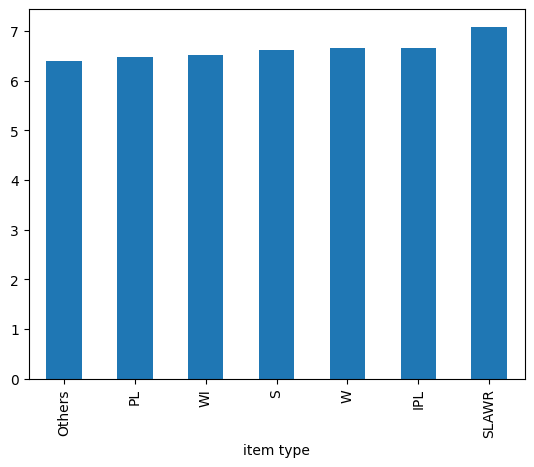

In [ ]:
df.groupby('item type')['selling_price_log'].mean().sort_values().plot(kind='bar')


<Axes: xlabel='status'>

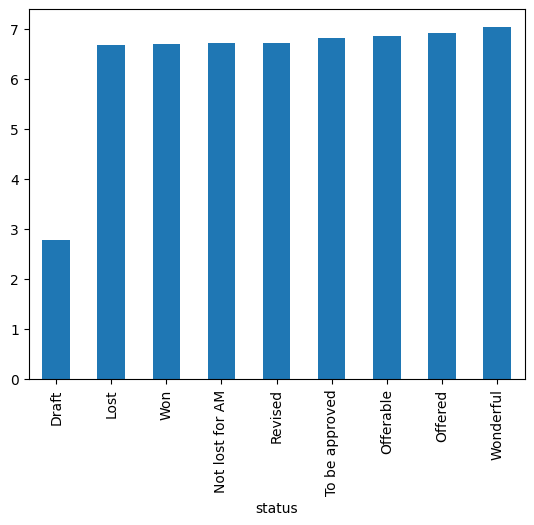

In [ ]:
df.groupby('status')['selling_price_log'].mean().sort_values().plot(kind='bar')

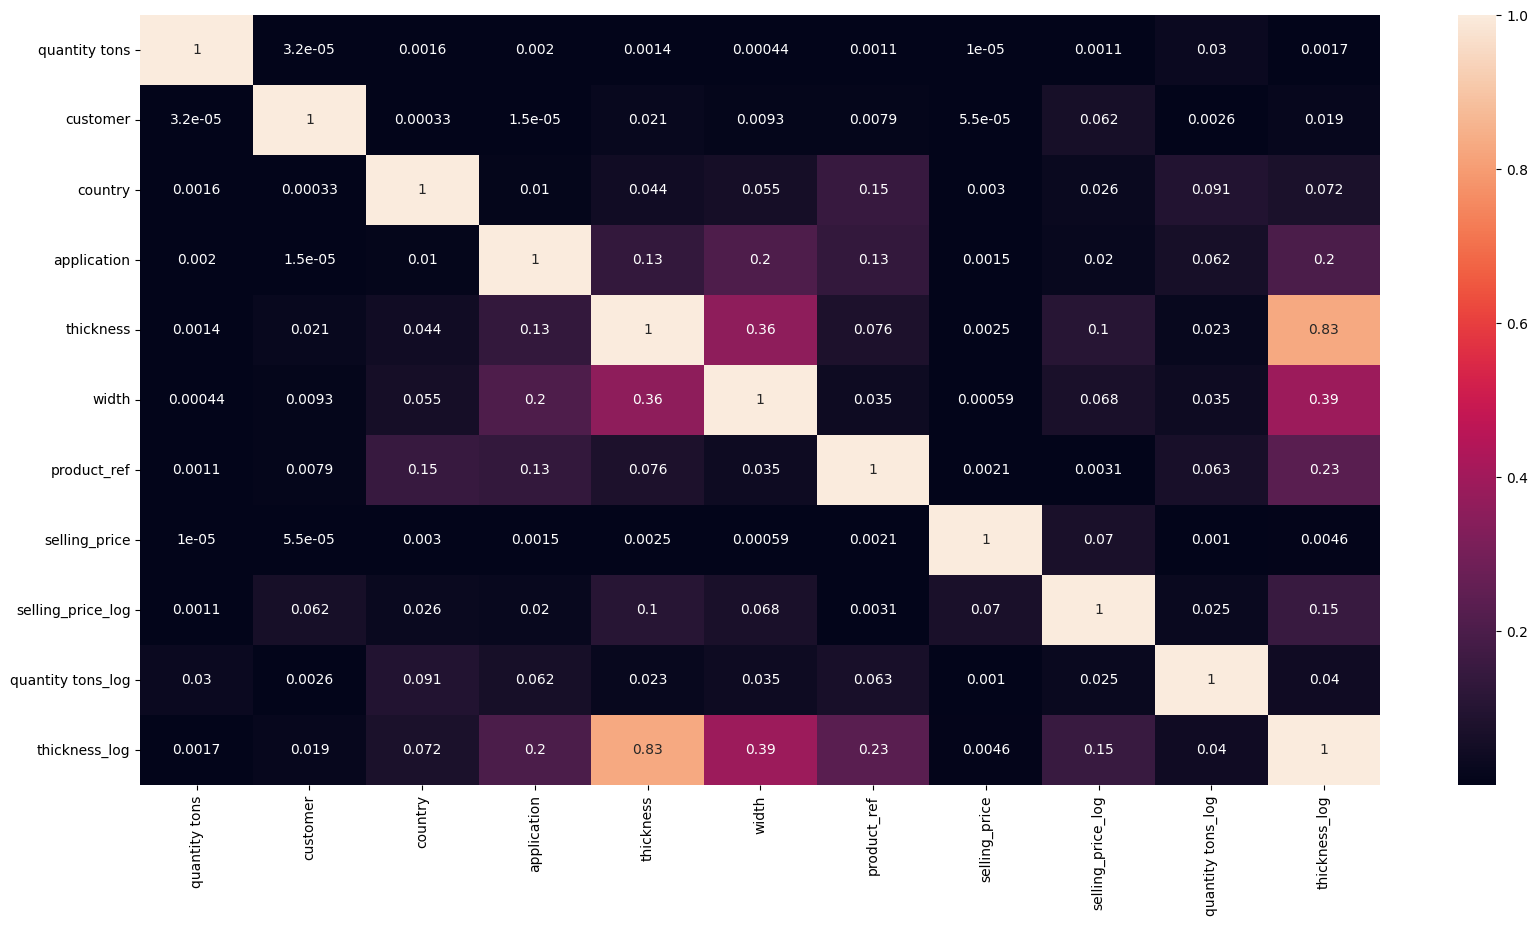

In [ ]:
# Select only numeric columns from your DataFrame
numeric_data = df.select_dtypes(include=[np.number])

# Create a correlation matrix for numeric columns
correlation_matrix = numeric_data.corr().abs()
#if this code not working add [255] code top of this code
# Create a heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

<Axes: >

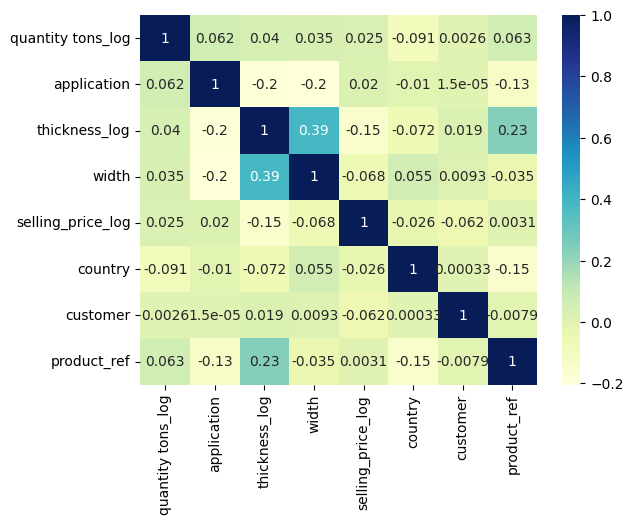

In [ ]:
x=df[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()
sns.heatmap(x, annot=True, cmap="YlGnBu")

In [ ]:
unique_item_types = df['item type'].unique()

print(unique_item_types)

['W' 'WI' 'S' 'Others' 'PL' 'IPL' 'SLAWR']


In [ ]:
unique_status = df['status'].unique()

print(unique_status)

['Won' 'Draft' 'To be approved' 'Lost' 'Not lost for AM' 'Wonderful'
 'Revised' 'Offered' 'Offerable']


In [ ]:
# encoding categorical variables
a = OneHotEncoder(handle_unknown='ignore')
a.fit(df[['item type']])
a1= a.fit_transform(df[['item type']]).toarray()
b = OneHotEncoder(handle_unknown='ignore')
b.fit(df[['status']])
b2 = b.fit_transform(df[['status']]).toarray()

In [ ]:
a1

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [ ]:
df

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,selling_price_log,quantity tons_log,thickness_log
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1.670799e+09,2021-07-01,854.00,6.749931,3.991779,0.693147
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,unknown,1.668702e+09,2021-04-01,1047.00,6.953684,6.643822,-0.223144
2,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,6.283770e+05,2021-01-01,644.33,6.468211,5.956169,-0.967584
3,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1.668702e+09,2021-01-01,768.00,6.643790,5.310301,0.832909
4,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,6.406650e+05,2021-03-01,577.00,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176445,2020-07-08,36.717238,30213686.0,78.0,Won,W,10.0,8.00,2000.0,S355J2+N-CL1,6.406650e+05,2020-08-01,498.00,6.210600,3.603246,2.079442
176446,2020-07-08,48.579643,30205078.0,26.0,To be approved,S,10.0,2.90,1780.0,unknown,1.641416e+08,2020-08-01,623.00,6.434547,3.883205,1.064711
176447,2020-07-08,3022.304001,30336279.0,78.0,Won,W,59.0,2.00,1035.0,unknown,6.406650e+05,2020-07-01,535.00,6.282267,8.013775,0.693147
176448,2020-07-08,4.568723,30231432.0,78.0,Won,W,41.0,0.50,1250.0,QBR03,6.119930e+05,2020-07-01,974.00,6.881411,1.519234,-0.693147


In [ ]:
X=df[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df['selling_price_log']

In [ ]:
# independent features after encoding
import numpy as np
X= np.concatenate((df[['quantity tons_log',
                       'application',
                       'thickness_log',
                       'width','country',
                       'customer',
                       'product_ref']].values, a1, b2), axis=1)

y=df['selling_price_log']




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
#from sklearn.preprocessing import StandardScaler()
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

**Linear regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.coef_,lr_model.intercept_


(array([-9.91232332e-03,  1.20593724e-02, -1.12760655e-01,  3.66532768e-03,
        -9.74543186e-03,  2.88353388e-03,  8.92887573e-03, -1.94872402e+08,
        -8.93179646e+08, -2.66614961e+09, -7.40732293e+09, -3.82206311e+07,
        -7.52229020e+09, -8.17667950e+08,  1.09153603e+09,  3.24930139e+09,
         2.58126600e+09,  6.57089011e+07,  1.43943762e+08,  1.26941471e+09,
         1.25769943e+09,  3.98639727e+09,  2.07795679e+07]),
 6.631193115877435)

In [ ]:
#r2_score(y_test,lr_model.predict(X_test))

In [ ]:
lr_model.score(X_test, y_test)

0.8555774432282812

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.8623051937061023
0.8555774432282812


In [122]:
from sklearn.model_selection import cross_val_score
#synatx : cross_val_score(model, fts_train, target_train, bins).mean()
cross_val_lr_model=cross_val_score(lr_model,X_train,y_train,cv=10).mean()
cross_val_lr_model

-5.686381669559604e+22

**Decision Tree Regression**

 **Choosing the best of depth Value**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

max_depth=np.arange(1,20)
cross_val_dt=[]
for d in max_depth:
  dt_regressor= DecisionTreeRegressor(max_depth=d, random_state=0)
  dt_regressor.fit(X_train,y_train)
  print("Depth : ", d, " train Score  : ", dt_regressor.score(X_train,y_train), "cross_val_score : ", cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())
  cross_val_dt.append(cross_val_score(dt_regressor,X_train,y_train,cv = 10).mean())

Depth :  1  train Score  :  0.820667642127563 cross_val_score :  0.8206745252210151
Depth :  2  train Score  :  0.8693711466447538 cross_val_score :  0.8694027978082994
Depth :  3  train Score  :  0.8776874228170599 cross_val_score :  0.8776323731044249
Depth :  4  train Score  :  0.8843191782922232 cross_val_score :  0.8841729975526331
Depth :  5  train Score  :  0.8902304340037481 cross_val_score :  0.887283368243413
Depth :  6  train Score  :  0.8930464429273128 cross_val_score :  0.890010086035591
Depth :  7  train Score  :  0.8960152724062401 cross_val_score :  0.8926198035623351
Depth :  8  train Score  :  0.8998630416694862 cross_val_score :  0.8960839346208939
Depth :  9  train Score  :  0.9055540919024727 cross_val_score :  0.9002283017558718
Depth :  10  train Score  :  0.9107145201840003 cross_val_score :  0.904301018282719
Depth :  11  train Score  :  0.916109479472244 cross_val_score :  0.9073799653428697
Depth :  12  train Score  :  0.9236156259631074 cross_val_score :  0

In [ ]:
cross_val_dt_regressor=max(cross_val_dt)
cross_val_dt_regressor

0.9188680425192235

In [ ]:
print("The best depth is 16 and Cross_val_score is:",cross_val_dt_regressor)

The best depth is 16 and Cross_val_score is: 0.9188680425192235


**Implementing Decision Tree Regression**

In [ ]:
dt_regressor=DecisionTreeRegressor(max_depth=17, random_state=0)
dt_regressor.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=16, random_state=0)

In [ ]:
cross_val_dt_regressor=cross_val_score(dt_regressor,X_train,y_train,cv=10).mean()
cross_val_dt_regressor

0.9165118795414002

In [ ]:
ftImp = list(zip(dt_regressor.feature_importances_, df.columns[:-1]))
imp = pd.DataFrame(ftImp, columns = ["Importance","Feature"])
imp.sort_values("Importance",ascending = False,inplace=True)
imp

,Importance,Feature
14,0.866741,quantity tons_log
6,0.067384,application
5,0.016000,item type
0,0.012205,item_date
4,0.010401,status
2,0.007887,customer
3,0.005880,country
1,0.004672,quantity tons
12,0.001532,selling_price
10,0.001412,product_ref


**Extreme Gradient Boosting Regression**

**Choosing the best Learning Rate**

In [91]:
import xgboost as xgb

cross_val_xgb=[]
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBRegressor(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())
  cross_val_xgb.append(cross_val_score(xgb_regressor,X_train,y_train,cv = 15).mean())

Learning rate :  0.01 cross_val_score: 0.7726801312572562
Learning rate :  0.05 cross_val_score: 0.9036655025283891
Learning rate :  0.08 cross_val_score: 0.9087285241399353
Learning rate :  0.1 cross_val_score: 0.9109785298317614
Learning rate :  0.2 cross_val_score: 0.9187615194746256
Learning rate :  0.25 cross_val_score: 0.9205647226002577
Learning rate :  0.3 cross_val_score: 0.9225329226998954


In [92]:
cross_val_xgb_regressor=max(cross_val_xgb)
cross_val_xgb_regressor

0.9225329226998954

In [93]:
print("The best Learning rate is 0.3 and Cross_val_score is:",cross_val_xgb_regressor)

The best Learning rate is 0.3 and Cross_val_score is: 0.9225329226998954


**Implementing Extreme Gradient Boosting Regression**

In [95]:
  xgb_regressor= xgb.XGBRegressor(learning_rate =0.3,n_estimators=100) # initialise the model
  xgb_regressor.fit(X_train,y_train) #train the model


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [96]:
cross_val_xgb_regressor=cross_val_score(xgb_regressor,X_train,y_train,cv=15).mean()
cross_val_xgb_regressor

0.9225329226998954

**Random Forest Regression**

**Choosing the best depth value**

In [103]:
from sklearn.ensemble import RandomForestRegressor

max_depth=np.array([2,4,8,10,12,14,16,18])
cross_val_rf=[]
for d in max_depth:
  rf_regressor=RandomForestRegressor(max_depth=d, random_state=0)
  rf_regressor.fit(X_train,y_train)
  print("Depth : ", d, "cross_val_score : ", cross_val_score(rf_regressor,X_train,y_train,cv = 10).mean())
  cross_val_rf.append(cross_val_score(rf_regressor,X_train,y_train,cv = 10).mean())

Depth :  2 cross_val_score :  0.8693990028981604
Depth :  4 cross_val_score :  0.8846013480516539
Depth :  8 cross_val_score :  0.8988082522802181
Depth :  10 cross_val_score :  0.9088560428178495
Depth :  12 cross_val_score :  0.9184619097123106
Depth :  14 cross_val_score :  0.9263858682021435
Depth :  16 cross_val_score :  0.9320214365633236
Depth :  18 cross_val_score :  0.9352886097157793


In [104]:
cross_val_rf_regressor=max(cross_val_rf)
cross_val_rf_regressor

0.9352886097157793

In [105]:
print("The best depth is 18 and Cross_val_score is:",cross_val_rf_regressor)

The best depth is 18 and Cross_val_score is: 0.9352886097157793


**Implementing Random Forest Regression**

In [109]:
rf_regressor=RandomForestRegressor(max_depth=18, random_state=0)
rf_regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=18, random_state=0)

In [110]:
cross_val_rf_regressor=cross_val_score(rf_regressor,X_train,y_train,cv=10).mean()
cross_val_rf_regressor

0.9352886097157793

** R2 Score for Machine-Learning Models**

In [112]:
from sklearn.metrics import r2_score
y_pred_lr=lr_model.predict(X_test)
y_pred_dt= dt_regressor.predict(X_test)
y_pred_rf=rf_regressor.predict(X_test)
y_pred_xgb=xgb_regressor.predict(X_test)

In [116]:
R2_score_lr=r2_score(y_test,y_pred_lr)
R2_score_dt=r2_score(y_test,y_pred_dt)
R2_score_rf=r2_score(y_test,y_pred_rf)
R2_score_xgb=r2_score(y_test,y_pred_xgb)

In [118]:
print("R2 Score for Linear Regression Model:",R2_score_lr)
print("R2 Score for Decision Tree Regression Model: ",R2_score_dt)
print("R2 Score for Random Forest Regression Model: ",R2_score_rf)
print("R2 Score for Extreme-Gradient Boosting Regression Model: ",R2_score_xgb)

R2 Score for Linear Regression Model: 0.8555774433007005
R2 Score for Decision Tree Regression Model:  0.9095766437058667
R2 Score for Random Forest Regression Model:  0.9268504955575462
R2 Score for Extreme-Gradient Boosting Regression Model:  0.9143518768615677


**Cross-Validation Score for Machine-Learning Models**

In [123]:
print("Cross Validation Score for Linear Regression Model:",cross_val_lr_model)
print("Cross Validation Score for Decision Tree Regression Model: ",cross_val_dt_regressor)
print("Cross Validation Score for Random Forest Regression Model: ",cross_val_rf_regressor)
print("Cross Validation Score for Extreme-Gradient Boosting Regression Model: ",cross_val_xgb_regressor)

Cross Validation Score for Linear Regression Model: -5.686381669559604e+22
Cross Validation Score for Decision Tree Regression Model:  0.9165118795414002
Cross Validation Score for Random Forest Regression Model:  0.9352886097157793
Cross Validation Score for Extreme-Gradient Boosting Regression Model:  0.9225329226998954


**The best Model is Random Forest : 0.9352886097157793**